<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Pandas Tutorial -->  
	  <center>
	    <br>
        <h1>Part 2</h1>
        <br>
        <br>
        <strong>This tutorial follows the PANDAS Tutorials That you can find here : http://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html  </strong><a href="http://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html" target="_blank"></a>
	  </center>	
    <!-- Pandas Tutorial -->	
  </div>
<!-- ---------------------------------------------------- -->

**Create Data** - We begin by creating our own data set for analysis. This prevents the end user reading this tutorial from having to download any files to replicate the results below. We will export this data set to a text file so that you can get some experience pulling data from a text file.  
**Get Data** - We will learn how to read in the text file containing the baby names. The data consist of baby names born in the year 1880.  
**Prepare Data** - Here we will simply take a look at the data and make sure it is clean. By clean I mean we will take a look inside the contents of the text file and look for any anomalities. These can include missing data, inconsistencies in the data, or any other data that seems out of place. If any are found we will then have to make decisions on what to do with these records.  
**Analyze Data** - We will simply find the most popular name in a specific year.  
**Present Data** - Through tabular data and a graph, clearly show the end user what is the most popular name in a specific year.  

***NOTE:  
Make sure you have looked through all previous lessons as the knowledge learned in previous lessons will be needed for this exercise.***  
    

> ***Numpy*** will be used to help generate the sample data set. Importing the libraries is the first step we will take in the lesson.

In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

# Create Data  

The data set will consist of 1,000 baby names and the number of births recorded for that year (1980). We will also add plenty of duplicates so you will see the same baby name more than once. You can think of the multiple entries per name simply being different hospitals around the country reporting the number of births per baby name. So if two hospitals reported the baby name "Bob", the data will have two values for the name Bob. We will start by creating the random set of baby names. 

In [2]:
# The inital set of baby names
names = ['Joey','Chandler','Monica','Phoebe','Ross', 'Rachel']



To make a random list of 1,000 baby names using the five above we will do the following:  

* Generate a random number between 0 and 4  

To do this we will be using the functions ***seed***, ***randint***, ***len***, ***range***, and ***zip***.   

In [ ]:
# This will ensure the random samples below can be reproduced. 
# This means the random samples will always be identical.
# We imported : from numpy import random
#import numpy as np -> np.random()
random.seed?

In [ ]:
random.randint?

In [ ]:
len?

In [ ]:
range?

In [ ]:
zip?

**seed(500)** - Create seed

**randint(low=0,high=len(names))** - Generate a random integer between zero and the length of the list "names".    

**names[n]** - Select the name where its index is equal to n.  

**for i in range(n)** - Loop until i is equal to n, i.e. 1,2,3,....n.  

**random_names** = Select a random name from the name list and do this n times.  

In [3]:
random.seed(500) ##setting the seed on the random number generator

In [4]:
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]

# Print first 10 records
random_names[:10]

['Monica',
 'Chandler',
 'Chandler',
 'Rachel',
 'Joey',
 'Rachel',
 'Rachel',
 'Chandler',
 'Chandler',
 'Rachel']

Generate a random numbers between 0 and 1000    

In [5]:
# The number of births per name for the year 1880
births = [random.randint(low=0,high=1000) for i in range(1000)]
births[:10]

[471, 56, 225, 107, 943, 290, 944, 292, 87, 334]

Merge the ***names*** and the ***births*** data set using the ***zip*** function.

In [6]:
#list(zip(random_names,births)) == zip(random_names,births)

True

In [7]:
BabyDataSet = list(zip(random_names,births))
BabyDataSet[:10]

[('Monica', 471),
 ('Chandler', 56),
 ('Chandler', 225),
 ('Rachel', 107),
 ('Joey', 943),
 ('Rachel', 290),
 ('Rachel', 944),
 ('Chandler', 292),
 ('Chandler', 87),
 ('Rachel', 334)]

We are basically done creating the data set. We now will use the ***pandas*** library to export this data set into a csv file. 

***df*** will be a ***DataFrame*** object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside ***df***.

In [8]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,Monica,471
1,Chandler,56
2,Chandler,225
3,Rachel,107
4,Joey,943
5,Rachel,290
6,Rachel,944
7,Chandler,292
8,Chandler,87
9,Rachel,334


* Export the dataframe to a ***text*** file. We can name the file ***births1880.txt***. The function ***to_csv*** will be used to export. The file will be saved in the same location of the notebook unless specified otherwise.

In [9]:
df.to_csv('births1880.txt',index=False,header=False)

## Get Data

To pull in the text file, we will use the pandas function *read_csv*. Let us take a look at this function and what inputs it takes.

In [11]:
Location = r'births1880.txt'
df = pd.read_csv(Location)

Notice the ***r*** before the string. Since the slashes are special characters, prefixing the string with a ***r*** will escape the whole string.  

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Monica    999 non-null object
471       999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


Info says:  

* There are ***999*** records in the data set  
* There is a column named ***Monica*** with 999 values  
* There is a column named ***471*** with 999 values  
* Out of the ***two*** columns, one is ***numeric***, the other is ***non numeric***  

To actually see the contents of the dataframe we can use the ***head()*** function which by default will return the first five records. You can also pass in a number n to return the top n records of the dataframe. 

In [17]:
df.head()

,0,1
0,Monica,471
1,Chandler,56
2,Chandler,225
3,Rachel,107
4,Joey,943


This brings us to our first problem of the exercise. The ***read_csv*** function treated the first record in the text file as the header names. This is obviously not correct since the text file did not provide us with header names.  

To correct this we will pass the ***header*** parameter to the *read_csv* function and set it to ***None*** (means null in python).

In [15]:
df = pd.read_csv(Location, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
0    1000 non-null object
1    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


Info now says:  
* There are ***1000*** records in the data set  
* There is a column named ***0*** with 1000 values  
* There is a column named ***1*** with 1000 values  
* Out of the ***two*** columns, one is ***numeric***, the other is ***non numeric***  

Now lets take a look at the last five records of the dataframe

In [16]:
df.tail()

,0,1
995,Ross,246
996,Rachel,316
997,Monica,175
998,Chandler,429
999,Ross,490


If we wanted to give the columns specific names, we would have to pass another paramter called ***names***. We can also omit the *header* parameter.

In [18]:
df = pd.read_csv(Location, names=['Names','Births'])
df.head(5)

,Names,Births
0,Monica,471
1,Chandler,56
2,Chandler,225
3,Rachel,107
4,Joey,943


## Prepare Data

The data we have consists of baby names and the number of births in the year 1980. We already know that we have 1,000 records and none of the records are missing (non-null values). We can verify the "Names" column still only has five unique names.  

We can use the ***unique*** property of the dataframe to find all the unique records of the "Names" column.

In [19]:
# Method 1:
df['Names'].unique()

array(['Monica', 'Chandler', 'Rachel', 'Joey', 'Phoebe', 'Ross'], dtype=object)

In [20]:
# If you actually want to print the unique values:
for x in df['Names'].unique():
    print(x)

Monica
Chandler
Rachel
Joey
Phoebe
Ross


In [21]:
# Method 2:
print(df['Names'].describe())
#print df.describe()

count     1000
unique       6
top       Joey
freq       176
Name: Names, dtype: object


Since we have multiple values per baby name, we need to aggregate this data so we only have a baby name appear once. This means the 1,000 rows will need to become 5. We can accomplish this by using the ***groupby*** function. 

In [ ]:
df.groupby?

In [22]:
# Create a groupby object
name = df.groupby('Names')
name.last()
# Apply the sum function to the groupby object
df_sum = name.sum()
df_sum

,Births
Names,
Chandler,77359
Joey,88536
Monica,81468
Phoebe,72916
Rachel,88094
Ross,88968


## Analyze Data

To find the most popular name or the baby name with the higest birth rate, we can do one of the following.  

* Sort the dataframe and select the top row
* Use the ***max()*** attribute to find the maximum value

In [25]:
# Method 1:
Sorted = df_sum.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Births
Names,
Ross,88968


In [32]:
# Method 2:
df_sum['Births'].idxmax()
df_sum.loc[[df_sum['Births'].idxmax()]]

,Births
Names,
Ross,88968


## Present Data

Here we can plot the ***Births*** column and label the graph to show the end user the highest point on the graph. In conjunction with the table, the end user has a clear picture that **Bob** is the most popular baby name in the data set. 

The most popular name


,Births
Names,
Ross,88968
Joey,88536
Rachel,88094
Monica,81468
Chandler,77359
Phoebe,72916


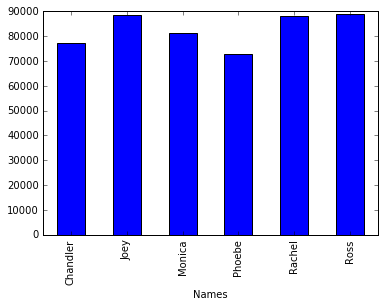

In [34]:
# Create graph
df_sum['Births'].plot.bar()

print("The most popular name")
df_sum.sort_values(by='Births', ascending=False)

<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>